In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\SQLDATA\\PROJECT\\S&P 500 STOCK DATA\\DATA\\S&P 500 STOCK DATA\\all_stocks_5yr.csv")

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.shape

(619040, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
#lấy dữ liệu dòng trên gán vào dòng đang trống
df[['open','high','low']] = df[['open','high','low']].ffill()

In [8]:
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [date, open, high, low, close, volume, Name]
Index: []


In [9]:
df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
df.to_csv("Stock_500.csv", index=False)

In [11]:
df2 = pd.read_csv("D:\\SQLDATA\\PROJECT\\S&P 500 STOCK DATA\\DATA\\Stock_500.csv")

In [12]:
df2.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [65]:
#Số cổ phiếu
df2['Name'].nunique()

505

In [27]:
df2.describe()

,date,open,high,low,close,volume
count,619040,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443264,83.023831,83.778918,82.256670,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.379721,98.208681,96.508495,97.389748,8.693610e+06


In [33]:
#phần trăm thay đổi giá đóng cửa theo từng mã cổ phiếu
df2['pct_change'] = df2.groupby('Name')['close'].pct_change() * 100

In [35]:
top_growth = df2.sort_values(by='pct_change', ascending=False).groupby('Name').head(1)
print(top_growth[['Name', 'date','open', 'close', 'pct_change']])

        Name       date   open  close  pct_change
349477   LNT 2016-05-20  35.80  35.91  100.951315
581387  VRTX 2013-04-19  81.55  85.60   61.906563
39639    AMD 2016-04-22   3.19   3.99   52.290076
425051   NWL 2017-09-15  43.13  43.20   40.214216
523336   STZ 2013-02-14  40.80  43.75   37.233375
...      ...        ...    ...    ...         ...
129938   CMS 2015-03-18  34.37  35.50    3.227682
179478   DTE 2015-02-18  82.06  84.50    3.162007
189518    ED 2013-09-18  55.52  56.99    3.093343
58998   APTV 2018-01-05  89.80  91.57    2.991789
590588   WEC 2014-10-31  49.81  49.66    2.900953

[505 rows x 5 columns]


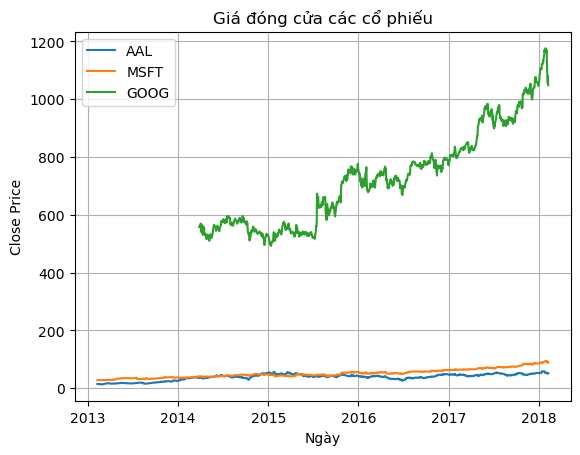

In [49]:

tickers = ['AAL', 'MSFT', 'GOOG'] 

for ticker in tickers:
    temp = df2[df2['Name'] == ticker]
    plt.plot(temp['date'], temp['close'], label=ticker)

plt.title("Giá đóng cửa các cổ phiếu")
plt.xlabel("Ngày")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


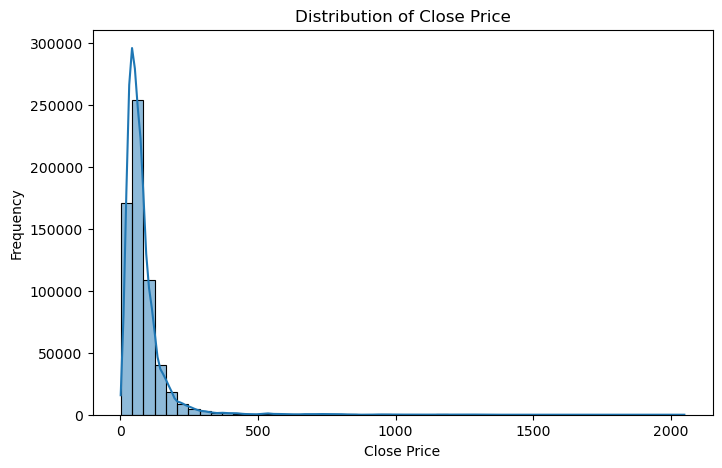

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df2['close'], bins=50, kde=True)
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

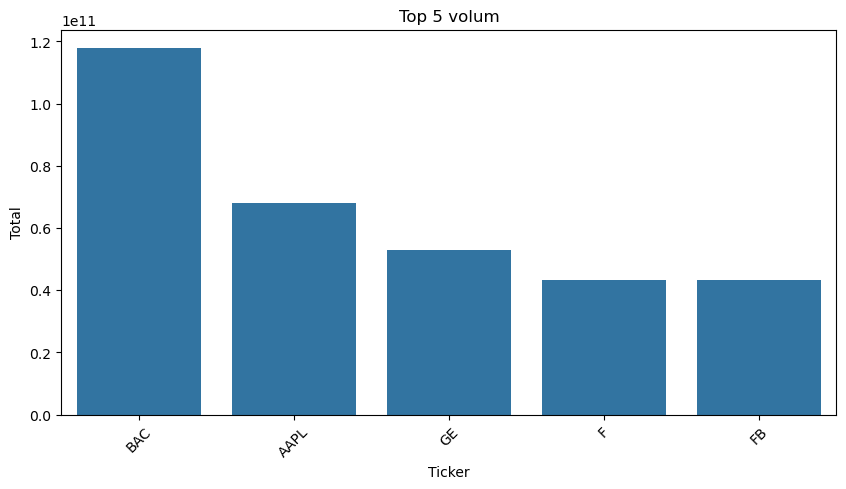

In [51]:
top10_volume = df2.groupby('Name')['volume'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_volume.index, y=top10_volume.values)
plt.title("Top 5 volum")
plt.ylabel("Total")
plt.xlabel("Ticker")
plt.xticks(rotation=45)
plt.show()

In [77]:
df2['%Growth'] = ((df2['close'] - df2['open']) / df2['open']) * 100
top5 = df2.sort_values(by='%Growth',ascending=False).head(6)
print("Top 5 cổ phiếu tăng giá mạnh nhất:")
print(top5)

Top 5 cổ phiếu tăng giá mạnh nhất:
             date   open     high      low   close     volume Name  \
113362 2014-05-19  18.77  33.9525  33.6950  33.895    1078888  CHD   
239832 2016-07-01  31.56  32.1400  30.4100  49.540          0  FTV   
595195 2016-01-14  13.42  18.4400  13.2401  18.290   42552128  WMB   
115071 2016-03-02   2.62   3.7500   2.6000   3.400   76288029  CHK   
115072 2016-03-03   3.37   4.7200   3.3200   4.270  138475442  CHK   
39639  2016-04-22   3.19   3.9900   3.1800   3.990  143265305  AMD   

        pct_change    %Growth  daily_return  
113362    0.073812  80.580714      0.000738  
239832         NaN  56.970849           NaN  
595195   34.386481  36.289121      0.343865  
115071   23.188406  29.770992      0.231884  
115072   25.588235  26.706231      0.255882  
39639    52.290076  25.078370      0.522901  


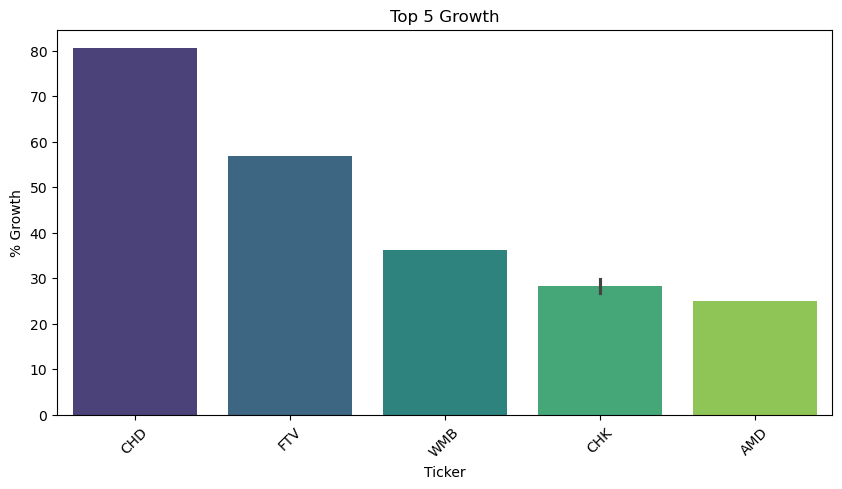

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(data=top5, x='Name', y='%Growth', palette='viridis', hue='Name')
plt.title("Top 5 Growth")
plt.ylabel("% Growth")
plt.xlabel("Ticker")
plt.xticks(rotation=45)
plt.show()

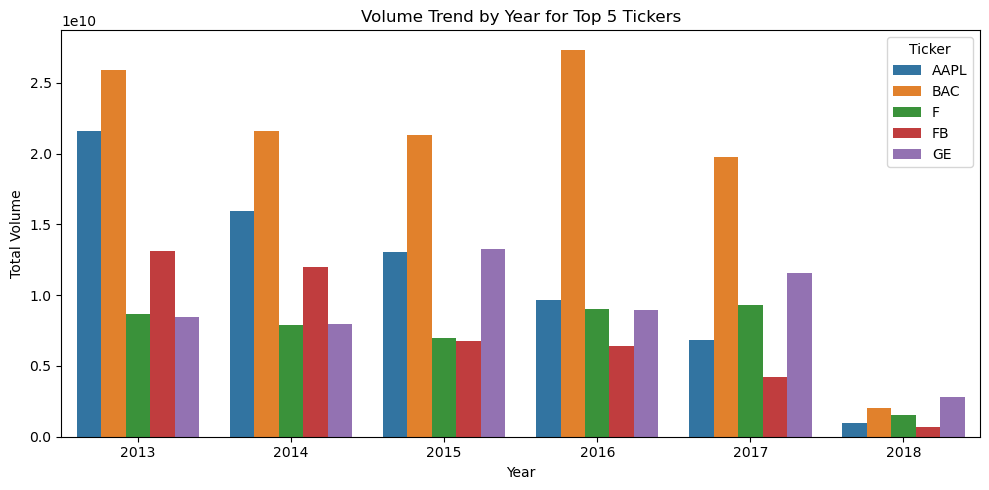

In [82]:
top5_ticker = df2.groupby('Name')['volume'].sum().sort_values(ascending=False).head(5).index

# Lọc volume_trend chỉ gồm top 5 ticker
volume_trend_top5 = volume_trend[volume_trend['Name'].isin(top5_ticker)]

# Vẽ lại biểu đồ cho top 5 ticker
plt.figure(figsize=(10,5))
sns.barplot(data=volume_trend_top5, x='year', y='volume', hue='Name')

plt.title('Volume Trend by Year for Top 5 Tickers')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()


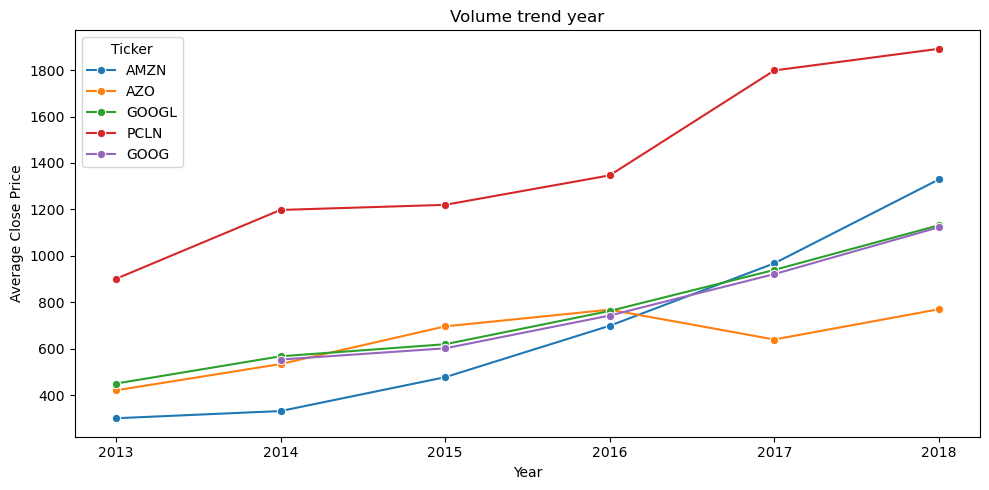

In [88]:
top5_close = df2.groupby('Name')['close'].sum().sort_values(ascending=False).head(5).index
df_top5_close = df2[df2['Name'].isin(top5_close)].copy()
df_top5_close['year'] = df_top5_close['date'].dt.year

close_trend = df_top5_close.groupby(['year','Name'])['close'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=close_trend, x='year', y='close', hue='Name', marker='o')
plt.title("Volume trend year")
plt.ylabel("Average Close Price")
plt.xlabel("Year")
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()
